# Assignment 1. Sentiment analysis using Naive Bayes classifier

Full instructions on completion of this assignment can be found in Canvas.

## 1. Theoretical part

### Naive Bayes Classifier, the Bernoulli model

Let $V$ be a set of words $\{v_1 ,v_2 ,...,v_{|V|} \}$ (dictionary). In the Bernoulli model for each class $c_j$ we look at random $|V|$-dimentional variable ($\beta_{1j}, \beta_{2j}, ..., \beta_{|V|j}$) with independent components. Component $\beta_i$ corresponds to $v_i$ word in the dictionary and has Bernoulli distribution with success probability $s_{ij}$. In other words, for each class $c_j$ we have our own set of $|V|$ asymmetrical coins.

In order to generate a document (words collection) we need to flip all these coins and choose those words from the dictionary that appeared with "heads". 

Documents that differ only with the word order or/and frequencies should be considered equal.

In each of the following questions write the formula in the **general form** first, then its **estimation on the train set** using **additive smoothing** (Laplace smoothing).

a) Find $P(v_i \in d | c_j)$ -- probability to see the word $v_i$ from the dictionary $V$ in a random document of $c_j$ class

$$P(v_i \in d | c_j) = \frac{\sum_{k=1}^{|D|} \beta_{ki} P(c_j |d_k) }{\sum_{k=1}^{|D|}P(c_j |d_k) }~,~where~~P(c_j |d_k) = (0,1) $$ 
<center>With additive smoothing (Laplace smoothing). <center\>
$$P(v_i \in d | c_j) = \frac{\sum_{k=1}^{|D|} \beta_{ki} P(c_j |d_k)+1 }{\sum_{k=1}^{|D|}P(c_j |d_k)+|C| } = \frac{\sum_{k=1}^{|D|} \beta_{ki} P(c_j |d_k)+1 }{\sum_{k=1}^{|D|}P(c_j |d_k) + 2 }~,~where~~P(c_j |d_k) = (0,1) $$ 

b) Find $P(d=(k_1,k_2,...,k_{|V|}) | c_j)$ – probability of document $d$ from class $c_j$ to comprise $k_1, k_2, ..., k_{|V|}$ entries of words $v_1, v_2, ..., v_{|V|}$. Use the naive assumption that the features are independent.
$$P(d=(k_1,k_2,...,k_{|V|}) | c_j) = \prod_{i=1}^{|V|}P(v_i | c_j)^{\beta_{ki}}(1-P(v_i | c_j))^{(1-\beta_{ki})} = \prod_{i=1}^{|V|} \beta_{ki} P(v_i | c_j)+(1-\beta_{ki})(1-P(v_i | c_j))$$


c) Find $P(c_j|d)$ -- probability that document $d$ belongs to class $c_j$. Use Bayes’ rule.
$$P(c_j|d_i) = \frac{P(d_i|c_j)P(c_j)}{P(d_i)} = \text{As denominator is same for every class} = P(d_i|c_j)P(c_j)$$

d) Which class $c_j$ will be assigned to document $d$, given the $P(c_j)$ and $P(d|c_j)$? How to evaluate the error probability?

$$c = \operatorname{argmax}_{c \in C}P(c|d) =\operatorname{argmax}_{c \in C} \frac{P(d|c_j)P(c_j)}{P(d)} = \operatorname{argmax}_{c \in C} P(d|c_j)P(c_j)$$

### Multinomial Naive Bayes classifier
For each class $c_j$ we consider a random variable $W$ with multinominal distribution $Mult(r_{1j} ,..., r_{|V|j})$ (a dice with $|V|$ faces, probability of $i^{th}$ face is $r_{ij}$) and a random variable $N$ with the $P(N)$ distribution, $N \in [1, \infty)$.

For each document we first sample its length $n\sim P(N)$ than we sample $n$ times each word $w\sim Mutl(r_{1j},..., r_{|V|j} )$: $n$ times we roll the unsymmetrical dice with $V$ faces. 


We assume that document length does not depend on class: 
$$
P(N|c_j )=P(N)
$$

In this case we may ignore the length as well as the document probability $P(d)$. Documents that differ only with the word order are considered equal

a) Find $P(v_i \in d | c_j)$ -- probability to see the word $v_i$ from the dictionary $V$ in a random document of $c_j$ class

$$P(v_i \in d | c_j) = \frac{\sum_{k=1}^{|D|} r_{ki} P(c_j |d_k) }{\sum_{k=1}^{|D|}P(c_j |d_k) }~,~where~~P(c_j |d_k) = (0,1) $$ 

<center>With additive smoothing (Laplace smoothing). <center\>
    
$$P(v_i \in d | c_j) = \frac{\sum_{k=1}^{|D|} r_{ki} P(c_j |d_k)+1 }{\sum_{i=1}^{|V|}\sum_{k=1}^{|D|}r_{ki}P(c_j |d_k) + |V| }~,~where~~P(c_j |d_k) = (0,1) $$ 

b) Find $P(d=(k_1,k_2,...,k_{|V|}) | c_j)$ – probability of document $d$ from class $c_j$ to comprise $k_1, k_2, ..., k_{|V|}$ entries of words $v_1, v_2, ..., v_{|V|}$. Use the naive assumption that the features are independent.

$$P(d=(k_1,k_2,...,k_{|V|}) | c_j) = (\sum_{i=1}^{|V|}r_{ki})!\prod_{i=1}^{|V|}\frac{P(v_i | c_j)^{r_{ki}}}{r_{ki}!}  = |N|!\prod_{i=1}^{|V|}\frac{P(v_i | c_j)^{r_{ki}}}{r_{ki}!}$$


c) Find $P(c_j|d)$ -- probability that document $d$ belongs to class $c_j$. Use Bayes’ rule.
$$P(c_j|d_i) = \frac{P(d_i|c_j)P(c_j)}{P(d_i)} = \text{As denominator is same for every class} = P(d_i|c_j)P(c_j) \Rightarrow \text{let's go to logarithm representation}\Rightarrow$$
$$P(c_j|d_i) = \log P(c_j) + \sum_{i=1}^{|V|}r_{ki}\log P(v_i | c_j)$$

d) Which class $c_j$ will be assigned to document $d$, given the $P(c_j)$ and $P(d|c_j)$? How to evaluate the error probability?

$$c = \operatorname{argmax}_{c \in C}P(c|d) =\operatorname{argmax}_{c \in C} \frac{P(d|c_j)P(c_j)}{P(d)} = \operatorname{argmax}_{c \in C} P(d|c_j)P(c_j)$$

## 2. Practical part

_**NB**: Classifiers should be **compatible with python 3.7** and **independent of third-party (non-standard) libraries**. We recommend to install Anaconda and to create an environment, containing python 3.7 only:_

In [ ]:
!conda create -n a1 python=3.7 --yes

In [1]:
!conda activate a1 


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
If your shell is Bash or a Bourne variant, enable conda for the current user with

    $ echo ". /home/andrey/anaconda3/etc/profile.d/conda.sh" >> ~/.bashrc

or, for all users, enable conda with

    $ sudo ln -s /home/andrey/anaconda3/etc/profile.d/conda.sh /etc/profile.d/conda.sh

The options above will permanently enable the 'conda' command, but they do NOT
put conda's base (root) environment on PATH.  To do so, run

    $ conda activate

in your terminal, or to put the base environment on PATH permanently, run

    $ echo "conda activate" >> ~/.bashrc

Previous to conda 4.4, the recommended way to activate conda was to modify PATH in
your ~/.bashrc file.  You should manually remove the line that looks like

    export PATH="/home/andrey/anaconda3/bin:$PATH"

^^^ The above line should NO LONGER be in your ~/.bashrc file! ^^^




In [1]:
import pandas as pd
import numpy as np 
import re

Implement Bernoulli Naive Bayes and Multinomial Naive Bayes classifiers. Evaluate them on FILIMDB Dataset ([http://github.com/slangtech/filimdb_evaluation](http://github.com/slangtech/filimdb\_evaluation)). Use accuracy to compare their performance on train / dev / test sets.

1. Split train data into two lists: positives and negative reviews. What is the min/max/avg/median length of negative reviews?

In [2]:
def read_data(path):
    data_path = '../FILIMDB/'
    data_path += path
    data= []
    with open(data_path) as file:
        for line in file:
            data.append(line.strip())
    return data

In [3]:
train_texts, test_texts, dev_texts = read_data('train.texts'),read_data('test.texts'),read_data('dev.texts')
dev_b_texts, test_b_texts = read_data('dev-b.texts'),read_data('test-b.texts')
train_labels , dev_labels, dev_b_labels =  read_data('train.labels'), read_data('dev.labels'), read_data('dev-b.labels')


In [4]:
pd.Series(train_labels).value_counts()

pos    7520
neg    7480
dtype: int64

In [5]:
def pos_neg_reviews(sentiment,train_texts,train_labels):
    tr_labl= np.array(train_labels)
    tr_text= np.array(train_texts)
    return list(tr_text[np.where(tr_labl == sentiment)[0]])

In [6]:
train_texts_pos = pos_neg_reviews('pos',train_texts,train_labels)
train_texts_neg = pos_neg_reviews('neg',train_texts,train_labels)

In [7]:
len(train_texts_pos),len(train_texts_neg)

(7520, 7480)

In [8]:
train_texts_neg_len = [len(line) for line in train_texts_neg]

In [9]:
print('length of negative reviews\n','min =',np.min(train_texts_neg_len),'max =',np.max(train_texts_neg_len),)
print('avg =',np.mean(train_texts_neg_len),'median =',np.median(train_texts_neg_len))

length of negative reviews
 min = 52 max = 8969
avg = 1316.356550802139 median = 981.0


2. Preprocess the data. Convert texts to lowercase, surround non-alphanumeric symbols with spaces. 

_(Be careful: you may come across non-latin characters, e.g. **é** in the word "cliché". However, keeping this word is quite beneficial: word "cliché" serves as a good feature for negative reviews)._

In [10]:
import string

In [11]:
stopwords_eng = set(["them", "she", "wasn", "wasn't", "having", "ll", "hadn", "nor", "why", "these", "she's", "both", "you're", "an", "between", "myself", "because", "being", "ve", "while", "over", "whom", "isn", "shouldn", "wouldn't", "been", "d", "themselves", "does", "most", "below", "his", "you'll", "further", "there", "was", "ain", "doesn't", "each", "couldn", "which", "that'll", "down", "won't", "than", "y", "should've", "have", "until", "their", "through", "ma", "before", "is", "yours", "so", "up", "hasn", "doesn", "him", "very", "if", "mustn", "or", "it's", "too", "re", "mustn't", "as", "now", "isn't", "mightn't", "those", "other", "above", "who", "do", "the", "wouldn", "some", "this", "for", "don", "me", "any", "what", "theirs", "weren't", "mightn", "aren", "ours", "your", "didn't", "shan", "shouldn't", "off", "has", "just", "himself", "herself", "m", "we", "by", "aren't", "yourselves", "again", "after", "you've", "you", "how", "such", "can", "o", "were", "not", "they", "out", "few", "with", "i", "be", "haven't", "are", "s", "hadn't", "had", "our", "don't", "in", "needn't", "but", "during", "weren", "it", "will", "a", "did", "of", "shan't", "ourselves", "and", "no", "doing", "yourself", "at", "then", "you'd", "he", "once", "about", "where", "more", "only", "into", "same", "my", "hers", "t", "when", "its", "own", "here", "all", "won", "needn", "under", "br", "that", "couldn't", "from", "against", "itself", "am", "should", "her", "on", "to", "didn", "haven", "hasn't","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you're", "you've", "you'll", "you'd", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "she's", "her", "hers", "herself", "it", "it's", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "that'll", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "don't", "should", "should've", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "aren't", "couldn", "couldn't", "didn", "didn't", "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", "isn't", "ma", "mightn", "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "wouldn", "wouldn't", "br"])

In [12]:
def preprocess(text,stop_words=False,punctuation=False):
    """
    Preprocess the data
    
    stop_words: flag to remove stopwords
    punctuation: flag to remove punctuation
    """
    new_text = []
    for num,value in enumerate(text):
        value = value.lower()
        
        for char in set(string.punctuation):
            value = value.replace(char," "+char+" ")

        if stop_words:
            pp = " ".join([word for word in value.split() if word not in stopwords_eng])
            if punctuation:
                punctn = string.punctuation+'…–—‘“‚„«»'
                pp = pp.translate(str.maketrans('', '',punctn ))
                new_text.append(" ".join(pp.split()))
            else:
                new_text.append(pp)
        else:
            new_text.append(" ".join(value.split())) # remove multiple spaces
             
        
    return new_text

In [13]:
train_texts = preprocess(train_texts, stop_words=True)
test_texts = preprocess(test_texts, stop_words=True,punctuation=True)
dev_texts = preprocess(dev_texts, stop_words=True,punctuation=True)

dev_b_texts = preprocess(dev_b_texts, stop_words=True,punctuation=True)
test_b_texts = preprocess(test_b_texts, stop_words=True,punctuation=True)

In [14]:
train_texts_stop_punc = preprocess(train_texts, stop_words=True,punctuation=True)

In [15]:
train_texts[0]

'myth regarding broken mirrors would accurate , everybody involved production would face approximately 170 years bad luck , lot mirrors falling little pieces . script shattering glass , " broken " would brilliant film . \' sadly overlong , derivative dull movie handful remarkable ideas memorable sequences . sean ellis made stylish elegantly photographed movie , story lackluster total absence logic explanation really frustrating . got discussion friend regarding basic concept " meaning " film . thinks ellis found inspiration old legend claiming spotting doppelganger foreboding \' going die . interesting theory , \' familiar legend \' find anything internet , neither . personally , think " broken " yet another umpteenth variation theme " invasion body snatchers " without alien interference . " broken " centers american mcvey family living london , particularly gina . mirror spontaneously breaks birthday celebration , triggers whole series mysterious seemingly supernatural events . gina s

In [16]:
train_texts_stop_punc[0]

'myth regarding broken mirrors would accurate everybody involved production would face approximately 170 years bad luck lot mirrors falling little pieces script shattering glass broken would brilliant film sadly overlong derivative dull movie handful remarkable ideas memorable sequences sean ellis made stylish elegantly photographed movie story lackluster total absence logic explanation really frustrating got discussion friend regarding basic concept meaning film thinks ellis found inspiration old legend claiming spotting doppelganger foreboding going die interesting theory familiar legend find anything internet neither personally think broken yet another umpteenth variation theme invasion body snatchers without alien interference broken centers american mcvey family living london particularly gina mirror spontaneously breaks birthday celebration triggers whole series mysterious seemingly supernatural events gina spots driving car follows mirror image apartment building whilst driving 

3. Tokenization step: reviews should be stored as lists of tokens ( tokens = words, numbers, punctuation). 

_NB: if tokenization is performed correctly, punctuation won't be adjacent to previous words. Moreover, place tokenization and preprocessing steps into separate functions (to be reused for test data preprocessing). Why is it important to preprocess both train and test data equally?_

In [17]:
def tokenization(text):
    return [line.split() for line in text]

In [18]:
train_texts_tok = tokenization(train_texts)
train_texts_stop_punc_tok = tokenization(train_texts_stop_punc)

In [19]:
dev_texts_tok = tokenization(dev_texts)
dev_b_texts_tok = tokenization(dev_b_texts)

4. Create two python dictionaries (words to frequencies) for positive and negative reviews, print their 15 most common words. 

Find 15 words with max and min Bayes weigths. Print both words and weights. Naive Bayes weight is equal to 
$$
log (\frac{P(w|pos)}{P(w|neg)}).$$


In [20]:
flag = True
train_texts_stop_punc_pos = preprocess(train_texts_pos,stop_words=flag,punctuation=flag)
train_texts_stop_punc_neg = preprocess(train_texts_neg,stop_words=flag,punctuation=flag)

In [21]:
train_texts_stop_punc_pos_tok = tokenization(train_texts_stop_punc_pos)
train_texts_stop_punc_neg_tok = tokenization(train_texts_stop_punc_neg)

In [22]:
def make_vocab(text, mode='ber'):
    vocab = dict()
    
    if mode == 'ber':    
        for line in text:
            for word in set(line):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
    else:
        for line in text:
            for word in line:     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
    return vocab

In [23]:
dict_stop_punc = make_vocab(train_texts_stop_punc_tok)

In [24]:
dict_stop_punc_pos = make_vocab(train_texts_stop_punc_pos_tok)
dict_stop_punc_neg = make_vocab(train_texts_stop_punc_neg_tok)

### 15 most common words. without stopwords &  punctuation

In [25]:
[(k, dict_stop_punc_pos[k]) for k in sorted(dict_stop_punc_pos, key=dict_stop_punc_pos.get, reverse=True)][:15]

[('movie', 4297),
 ('one', 4280),
 ('film', 4245),
 ('like', 3241),
 ('good', 2866),
 ('well', 2661),
 ('time', 2622),
 ('great', 2551),
 ('story', 2544),
 ('see', 2535),
 ('also', 2262),
 ('would', 2227),
 ('really', 2169),
 ('even', 2128),
 ('first', 2018)]

In [26]:
[(k, dict_stop_punc_neg[k]) for k in sorted(dict_stop_punc_neg, key=dict_stop_punc_neg.get, reverse=True)][:15]

[('movie', 4971),
 ('one', 4240),
 ('film', 4125),
 ('like', 3833),
 ('even', 2936),
 ('good', 2914),
 ('would', 2714),
 ('bad', 2653),
 ('time', 2645),
 ('really', 2411),
 ('see', 2335),
 ('much', 2248),
 ('get', 2166),
 ('make', 2142),
 ('could', 2085)]

In [27]:
train_pos_all,train_neg_all = len(train_texts_stop_punc_pos_tok),len(train_texts_stop_punc_neg_tok)
train_all = train_pos_all+train_neg_all 

In [28]:
p_c_pos = train_pos_all/(train_pos_all+train_neg_all)
p_c_neg = train_neg_all/(train_pos_all+train_neg_all)

In [29]:
df  = pd.DataFrame({'pos_cnt':pd.Series(dict_stop_punc_pos),'neg_cnt':pd.Series(dict_stop_punc_neg)})
df['pos_probs'] = (df['pos_cnt'].fillna(0)+1) /(train_pos_all+2)
df['neg_probs'] = (df['neg_cnt'].fillna(0)+1) /(train_neg_all+2)
df.fillna(1.0,inplace=True)
df['NB_weight'] = np.log(df['pos_probs']/df['neg_probs'])

In [30]:
df.sort_values('NB_weight',ascending=False).head(15)

,pos_cnt,neg_cnt,pos_probs,neg_probs,NB_weight
edie,26.0,1.0,0.003589,0.000134,3.290505
rea,22.0,1.0,0.003058,0.000134,3.130162
paulie,21.0,1.0,0.002925,0.000134,3.085711
antwone,20.0,1.0,0.002792,0.000134,3.039191
mildred,19.0,1.0,0.002659,0.000134,2.990400
visconti,17.0,1.0,0.002393,0.000134,2.885040
venoms,16.0,1.0,0.002260,0.000134,2.827881
joss,16.0,1.0,0.002260,0.000134,2.827881
tsui,15.0,1.0,0.002127,0.000134,2.767257
magnificently,15.0,1.0,0.002127,0.000134,2.767257


In [31]:
df.sort_values('NB_weight',ascending=True).head(15)

,pos_cnt,neg_cnt,pos_probs,neg_probs,NB_weight
tedium,1.0,25.0,0.000133,0.003475,-3.263428
dreck,1.0,44.0,0.000266,0.006014,-3.118847
unwatchable,2.0,65.0,0.000399,0.008821,-3.096374
stinker,2.0,64.0,0.000399,0.008688,-3.081107
steaming,1.0,19.0,0.000133,0.002673,-3.001064
manos,1.0,18.0,0.000133,0.002539,-2.949771
ajay,1.0,18.0,0.000133,0.002539,-2.949771
atrocious,5.0,106.0,0.000798,0.014301,-2.886401
boll,1.0,34.0,0.000266,0.004678,-2.867533
uwe,1.0,33.0,0.000266,0.004544,-2.838545


In [32]:
def fit(train,train_pos,train_neg,mode='ber'):
    
    dict_all = make_vocab(train,mode=mode)
    dict_pos = make_vocab(train_pos,mode=mode)
    dict_neg = make_vocab(train_neg,mode=mode)
    
    train_pos_all,train_neg_all = len(train_pos),len(train_neg)
    train_all = train_pos_all+train_neg_all 
    
    p_c_pos = train_pos_all/(train_pos_all+train_neg_all)
    p_c_neg = train_neg_all/(train_pos_all+train_neg_all)
    
    alpha = 1
    
    if mode == 'ber':
        df  = pd.DataFrame({'pos_cnt':pd.Series(dict_pos),'neg_cnt':pd.Series(dict_neg)})
        df['pos_probs'] = (df['pos_cnt'].fillna(0)+alpha) /(train_pos_all+2)
        df['neg_probs'] = (df['neg_cnt'].fillna(0)+alpha) /(train_neg_all+2)
        df.fillna(1.0,inplace=True)
        df['NB_weight'] = np.log(df['pos_probs']/df['neg_probs'])
    
    else:
        
        df  = pd.DataFrame({'pos_cnt':pd.Series(dict_pos),'neg_cnt':pd.Series(dict_neg)})
        all_pos_mul,all_neg_mul = np.sum(list(dict_pos.values())),np.sum(list(dict_neg.values()))

        df['pos_probs'] = (df['pos_cnt'].fillna(0)+alpha) /(all_pos_mul)
        df['neg_probs'] = (df['neg_cnt'].fillna(0)+alpha) /(all_neg_mul)
        df.fillna(1.0,inplace=True)
        df['NB_weight'] = np.log(df['pos_probs']/df['neg_probs'])
        
    vocab = set(dict_all.keys())
    vocab_pos = set(dict_pos.keys())
    vocab_neg = set(dict_neg.keys())
    
    return df, vocab, vocab_pos, vocab_neg
    
    

In [33]:
df, vocab, vocab_pos, vocab_neg = fit(train_texts_stop_punc_tok,train_texts_stop_punc_pos_tok,train_texts_stop_punc_neg_tok)

In [34]:
df.sort_values('NB_weight',ascending=False).head(15)

,pos_cnt,neg_cnt,pos_probs,neg_probs,NB_weight
edie,26.0,1.0,0.003589,0.000134,3.290505
rea,22.0,1.0,0.003058,0.000134,3.130162
paulie,21.0,1.0,0.002925,0.000134,3.085711
antwone,20.0,1.0,0.002792,0.000134,3.039191
mildred,19.0,1.0,0.002659,0.000134,2.990400
visconti,17.0,1.0,0.002393,0.000134,2.885040
venoms,16.0,1.0,0.002260,0.000134,2.827881
joss,16.0,1.0,0.002260,0.000134,2.827881
tsui,15.0,1.0,0.002127,0.000134,2.767257
magnificently,15.0,1.0,0.002127,0.000134,2.767257


In [35]:
df.sort_values('NB_weight',ascending=True).head(15)

,pos_cnt,neg_cnt,pos_probs,neg_probs,NB_weight
tedium,1.0,25.0,0.000133,0.003475,-3.263428
dreck,1.0,44.0,0.000266,0.006014,-3.118847
unwatchable,2.0,65.0,0.000399,0.008821,-3.096374
stinker,2.0,64.0,0.000399,0.008688,-3.081107
steaming,1.0,19.0,0.000133,0.002673,-3.001064
manos,1.0,18.0,0.000133,0.002539,-2.949771
ajay,1.0,18.0,0.000133,0.002539,-2.949771
atrocious,5.0,106.0,0.000798,0.014301,-2.886401
boll,1.0,34.0,0.000266,0.004678,-2.867533
uwe,1.0,33.0,0.000266,0.004544,-2.838545



5. Using formulas from Part 1, implement both Bayes classifiers. Fit the train set and predict label for the reviews from test set. How much time does it take to train classifiers and to make predictions for the test data? 
Compare the results on train, dev and test sets. Why do we have different accuracy values on different parts of the dataset (train and dev, dev and test)? 


### Bernoulli 

In [ ]:
from tqdm import tqdm_notebook

In [37]:
def predict_rigth(texts,vocab=vocab,df=df):
    tokens = tokenization(texts)
    probs = []
    pos_probs = df['pos_probs']
    neg_probs = df['neg_probs']
    
    p_c_pos = np.log(train_pos_all/train_all)
    p_c_neg = np.log(train_neg_all/train_all)

    for line in tqdm_notebook(tokens):
        pos_prob = p_c_pos
        neg_prob = p_c_neg
        line = set(line)
        for word in line:
            flag_pos = 0
            flag_neg = 0
            if word in vocab:
                if word in vocab_pos:
                    flag_pos = 1
                if word in vocab_neg:
                    flag_neg = 1
                p_prob,n_prob = pos_probs[word],neg_probs[word]
                pos_prob += np.log(flag_pos*p_prob+(1-flag_pos)*(1-p_prob))
                neg_prob += np.log(flag_neg*n_prob+(1-flag_neg)*(1-n_prob))
        if pos_prob > neg_prob:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [38]:
def predict(texts,vocab=vocab,df=df):
    tokens = tokenization(texts)
    probs = []
    p_c_pos = np.log(train_pos_all/(train_pos_all+train_neg_all))
    p_c_neg = np.log(train_neg_all/(train_pos_all+train_neg_all))
    pos_probs = df['pos_probs']
    neg_probs = df['neg_probs']
    for line in tqdm_notebook(tokens):
        pos_prob = p_c_pos
        neg_prob = p_c_neg
        line = set(line)
        for word in line:
            flag_pos = 0
            flag_neg = 0
            if word in vocab:
                if word in vocab_pos:
                    flag_pos = 1
                if word in vocab_neg:
                    flag_neg = 1
                p_prob,n_prob = pos_probs[word],neg_probs[word]
                pos_prob += np.log(flag_pos*p_prob+(1-flag_pos)*(p_prob))
                neg_prob += np.log(flag_neg*n_prob+(1-flag_neg)*(n_prob))
        if pos_prob > neg_prob:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [39]:
def predict_not_ber(texts,vocab=vocab,df=df):
    tokens = tokenization(texts)
    probs = []
    pos_probs = df['pos_probs']
    neg_probs = df['neg_probs']
    
    p_c_pos = np.log(train_pos_all/train_all)
    p_c_neg = np.log(train_neg_all/train_all)

    for line in tqdm_notebook(tokens):
        pos_prob = p_c_pos
        neg_prob = p_c_neg
        line = set(line)
        for word in line:
            if word in vocab:
                p_prob,n_prob = pos_probs[word],neg_probs[word]
                pos_prob += np.log(p_prob)-np.log(1-p_prob)
                neg_prob += np.log(n_prob)-np.log(1-n_prob)
        if pos_prob > neg_prob:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [40]:
def evaluate(pred,y_true):
    return len(np.where(np.array(y_true) == np.array(pred))[0])/len(y_true)

In [41]:
dev_probs = predict(dev_texts)
train_probs = predict(train_texts_stop_punc)
test_probs = predict(test_texts)
dev_b_probs = predict(dev_b_texts)
test_b_probs = predict(test_b_texts)

In [42]:
print('dev =',evaluate(dev_probs,dev_labels),'dev_b =',evaluate(dev_b_probs,dev_b_labels),'train =',evaluate(train_probs,train_labels))

dev = 0.8597 dev_b = 0.722 train = 0.9356666666666666


In [43]:
dev_probs_r = predict_rigth(dev_texts)
train_probs_r = predict_rigth(train_texts_stop_punc)

In [44]:
test_probs_r = predict_rigth(test_texts)

In [45]:
dev_b_probs_r = predict_rigth(dev_b_texts)
test_b_probs_r = predict_rigth(test_b_texts)

In [46]:
print('dev =',evaluate(dev_probs_r,dev_labels),'dev_b =',evaluate(dev_b_probs_r,dev_b_labels),'train =',evaluate(train_probs_r,train_labels))

dev = 0.6731 dev_b = 0.6415 train = 0.3728666666666667


From this result I will use rigth formula function in the future

In [47]:
dev_probs_n = predict_not_ber(dev_texts)
train_probs_n = predict_not_ber(train_texts_stop_punc)

In [48]:
dev_b_probs_n = predict_not_ber(dev_b_texts)

In [49]:
test_probs_n = predict_not_ber(test_texts)
test_b_probs_n = predict_not_ber(test_b_texts)

In [50]:
print('dev =',evaluate(dev_probs_n,dev_labels),'dev_b =',evaluate(dev_b_probs_n,dev_b_labels),'train =',evaluate(train_probs_n,train_labels))

dev = 0.8607 dev_b = 0.727 train = 0.9334


In [52]:
final = pd.Series(train_probs+dev_probs+test_probs+dev_b_probs+test_b_probs)

In [53]:
ind_train = [ 'train/'+str(i) for i in range(0,len(train_probs))]
ind_dev = [ 'dev/'+str(i) for i in range(0,len(dev_probs))]
ind_test = [ 'test/'+str(i) for i in range(0,len(test_probs))]
ind_devb = [ 'dev-b/'+str(i) for i in range(0,len(dev_b_probs))]
ind_testb = [ 'test-b/'+str(i) for i in range(0,len(test_b_probs))]
inds = ind_train+ind_dev +ind_test +ind_devb +ind_testb

In [54]:
final.index = inds

In [55]:
final_r = pd.Series(train_probs_r+dev_probs_r+test_probs_r+dev_b_probs_r+test_b_probs_r)

In [56]:
final_r.index = inds

In [57]:
final_n = pd.Series(train_probs_n+dev_probs_n+test_probs_n+dev_b_probs_n+test_b_probs_n)

In [58]:
final_n.index = inds

In [65]:
final.to_csv('preds_ber_new.tsv',sep='\t',header=False)

### MultiNomial

In [59]:
df_mul, vocab_mul, vocab_mul_pos, vocab_mul_neg = fit(train_texts_stop_punc_tok,train_texts_stop_punc_pos_tok,train_texts_stop_punc_neg_tok,mode='mul')

In [60]:
df_mul.sort_values('NB_weight',ascending=False).head(15)

,pos_cnt,neg_cnt,pos_probs,neg_probs,NB_weight
antwone,78.0,1.0,0.000084,0.000001,4.323984
edie,77.0,1.0,0.000083,0.000001,4.311245
paulie,72.0,1.0,0.000078,0.000001,4.244995
mildred,65.0,1.0,0.000070,0.000001,4.144191
gundam,62.0,1.0,0.000067,0.000001,4.097671
biko,45.0,1.0,0.000049,0.000001,3.783177
din,43.0,1.0,0.000047,0.000001,3.738726
flavia,43.0,1.0,0.000047,0.000001,3.738726
visconti,41.0,1.0,0.000045,0.000001,3.692206
khouri,36.0,1.0,0.000039,0.000001,3.565454


In [61]:
df_mul.sort_values('NB_weight',ascending=True).head(15)

,pos_cnt,neg_cnt,pos_probs,neg_probs,NB_weight
thunderbirds,1.0,43.0,0.000001,0.000049,-3.829654
boll,1.0,83.0,0.000002,0.000094,-3.783134
dahmer,1.0,41.0,0.000001,0.000047,-3.783134
beowulf,1.0,33.0,0.000001,0.000038,-3.571825
grendel,1.0,29.0,0.000001,0.000033,-3.446661
ajay,1.0,29.0,0.000001,0.000033,-3.446661
deathstalker,1.0,29.0,0.000001,0.000033,-3.446661
uwe,1.0,57.0,0.000002,0.000065,-3.412760
seagal,2.0,81.0,0.000003,0.000091,-3.353571
tedium,1.0,26.0,0.000001,0.000030,-3.341301


In [62]:
def predict_mul(texts):
    tokens = tokenization(texts)
    probs = []
    pos_probs = df_mul['pos_probs']
    neg_probs = df_mul['neg_probs']
    
    p_c_pos = np.log(train_pos_all/train_all)
    p_c_neg = np.log(train_neg_all/train_all)

    for line in tqdm_notebook(tokens):
        pos_prob = p_c_pos
        neg_prob = p_c_neg
        for word in line:
            if word in vocab_mul:
                p_prob,n_prob = pos_probs[word],neg_probs[word]
                pos_prob += np.log(p_prob)
                neg_prob += np.log(n_prob)
        if pos_prob > neg_prob:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [63]:
dev_probs_mul = predict_mul(dev_texts)
train_probs_mul = predict_mul(train_texts_stop_punc)

In [64]:
dev_b_probs_mul = predict_mul(dev_b_texts)
test_b_probs_mul = predict_mul(test_b_texts)

In [65]:
test_probs_mul = predict_mul(test_texts)

In [66]:
print('dev =',evaluate(dev_probs_mul,dev_labels),'dev_b =',evaluate(dev_b_probs_mul,dev_b_labels),'train =',evaluate(train_probs_mul,train_labels))

dev = 0.8593 dev_b = 0.7325 train = 0.928


In [67]:
final_mul = pd.Series(train_probs_mul+dev_probs_mul+test_probs_mul+dev_b_probs_mul+test_b_probs_mul)

In [68]:
final_mul.index = inds

In [80]:
final_mul.to_csv('preds_mul_new.tsv',sep='\t',header=False)

#### Train and Test time you can see with help tqdm_notebook

#### Why do we have different accuracy values on different parts of the dataset (train and dev, dev and test)? Because they include different information. Their structure can be different

6. Dictionaries may also contain not only unigrams (words) but also $N$-grams. Add bigrams to dictionaries: does it improve the results (calculate the difference)? Are trigrams helpful? $N$-grams with $n > 3$? Is it worth including $N$-grams (bi-, tri- or n- grams) to dictionaries at all? 

In [69]:
def ngrams(words, gram_range):
    pp = []
    for igram in range(gram_range[0],gram_range[1]+1):
        for i in range(len(words)-igram+1):
            pp.append(" ".join(words[i:i+igram]))
            
    return pp

In [84]:
def make_vocab_ngram(text, mode='ber',gram_range=(1,1), min_cnt=0):
    vocab = dict()
    
    if mode == 'ber':    
        for line in text:
            for word in set(ngrams(line,gram_range)):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
    else:
        for line in text:
            for word in ngrams(line,gram_range):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
                    
    if min_cnt:
        new_dict = dict()
        for key,val in vocab.items():
            if val > min_cnt:
                new_dict[key] = val
        vocab = new_dict
    return vocab

In [75]:
dict_bigr = make_vocab_ngram(train_texts_stop_punc_tok,gram_range=(1,2))
dict_bigr_pos = make_vocab_ngram(train_texts_stop_punc_pos_tok,gram_range=(1,2))
dict_bigr_neg = make_vocab_ngram(train_texts_stop_punc_neg_tok,gram_range=(1,2))

In [76]:
len(dict_bigr),len(dict_bigr_pos),len(dict_bigr_neg)

(1241551, 707400, 664166)

In [77]:
dict_bigr_mul = make_vocab_ngram(train_texts_stop_punc_tok,mode='mul',gram_range=(2,2))
dict_bigr_mul_pos = make_vocab_ngram(train_texts_stop_punc_pos_tok,mode='mul',gram_range=(2,2))
dict_bigr_mul_neg = make_vocab_ngram(train_texts_stop_punc_neg_tok,mode='mul',gram_range=(2,2))

In [78]:
vocab_bigr = set(dict_bigr.keys())
vocab_bigr_pos = set(dict_bigr_pos.keys())
vocab_bigr_neg = set(dict_bigr_neg.keys())

In [109]:
def fit_ngram(train,train_pos,train_neg,mode='ber',gram_range=(1,1), alpha = 1,min_cnt=0):
    
    dict_all = make_vocab_ngram(train,mode=mode,gram_range=gram_range,min_cnt=min_cnt)
    dict_pos = make_vocab_ngram(train_pos,mode=mode,gram_range=gram_range,min_cnt=min_cnt)
    dict_neg = make_vocab_ngram(train_neg,mode=mode,gram_range=gram_range,min_cnt=min_cnt)
    
    train_pos_all,train_neg_all = len(train_pos),len(train_neg)   

    
    if mode == 'ber':
        df  = pd.DataFrame({'pos_cnt':pd.Series(dict_pos),'neg_cnt':pd.Series(dict_neg)})
        df['pos_probs'] = (df['pos_cnt'].fillna(0)+alpha) /(train_pos_all+2)
        df['neg_probs'] = (df['neg_cnt'].fillna(0)+alpha) /(train_neg_all+2)
        df.fillna(1.0,inplace=True)
        df['NB_weight'] = np.log(df['pos_probs']/df['neg_probs'])
    
    else:
        
        df  = pd.DataFrame({'pos_cnt':pd.Series(dict_pos),'neg_cnt':pd.Series(dict_neg)})
        all_pos_mul,all_neg_mul = np.sum(list(dict_pos.values())),np.sum(list(dict_neg.values()))

        df['pos_probs'] = (df['pos_cnt'].fillna(0)+alpha) /(all_pos_mul)
        df['neg_probs'] = (df['neg_cnt'].fillna(0)+alpha) /(all_neg_mul)
        df.fillna(1.0,inplace=True)
        df['NB_weight'] = np.log(df['pos_probs']/df['neg_probs'])
        
    vocab = set(dict_all.keys())
    vocab_pos = set(dict_pos.keys())
    vocab_neg = set(dict_neg.keys())
    
    return df, vocab, vocab_pos, vocab_neg
    
    

In [86]:
df_bigr_ber, vocab_bigr_ber, vocab_bigr_ber_pos, vocab_bigr_ber_neg = fit_ngram(train_texts_stop_punc_tok, train_texts_stop_punc_pos_tok, train_texts_stop_punc_neg_tok, mode='ber',gram_range=(1,2))

In [87]:
df_bigr_ber.shape

(1241551, 5)

In [88]:
def tokenization_gram(text,gram_range = (1,1)):
    
    return [ngrams(line.split(),gram_range=gram_range) for line in text]

In [145]:
def predict_ber(texts,vocab=vocab,vocab_pos=vocab_pos,vocab_neg=vocab_neg,df=df,gram_range=(1,1)):
    tokens = tokenization_gram(texts,gram_range=gram_range)
    probs = []
    p_c_pos = np.log(train_pos_all/(train_pos_all+train_neg_all))
    p_c_neg = np.log(train_neg_all/(train_pos_all+train_neg_all))
    pos_probs = df['pos_probs']
    neg_probs = df['neg_probs']
    for line in tqdm_notebook(tokens):
        pos_prob = p_c_pos
        neg_prob = p_c_neg
        line = set(line)
        for word in line: # for accelerating I change loop words in vocab -> loop  words in tokens w
            flag_pos = 0
            flag_neg = 0
            if word in vocab:
                if word in vocab_pos:
                    flag_pos = 1
                if word in vocab_neg:
                    flag_neg = 1
                    
                p_prob,n_prob = pos_probs[word],neg_probs[word]
                pos_prob += np.log(flag_pos*p_prob+(1-flag_pos)*(p_prob))
                neg_prob += np.log(flag_neg*n_prob+(1-flag_neg)*(n_prob))
            
        if pos_prob > neg_prob:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [95]:
def predict_not_ber(texts,vocab=vocab,vocab_pos=vocab_pos,vocab_neg=vocab_neg,df=df,gram_range=(1,1)):
    tokens = tokenization_gram(texts,gram_range=gram_range)
    probs = []
    p_c_pos = np.log(train_pos_all/train_all)
    p_c_neg = np.log(train_neg_all/train_all)
    pos_probs = df['pos_probs']
    neg_probs = df['neg_probs']
    for line in tqdm_notebook(tokens):
        pos_prob = p_c_pos
        neg_prob = p_c_neg
        line = set(line)
        for word in line: # for accelerating I change loop words in vocab -> loop  words in tokens w
            if word in vocab:
                p_prob,n_prob = pos_probs[word],neg_probs[word]
                pos_prob += np.log(p_prob)-np.log(1-p_prob)
                neg_prob += np.log(n_prob)-np.log(1-n_prob)
        if pos_prob > neg_prob:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [91]:
def predict_mul(texts,vocab=vocab,df=df,gram_range=(1,1)):
    tokens = tokenization_gram(texts,gram_range=gram_range)
    probs = []
    p_c_pos = np.log(train_pos_all/(train_pos_all+train_neg_all))
    p_c_neg = np.log(train_neg_all/(train_pos_all+train_neg_all))
    pos_probs = df['pos_probs']
    neg_probs = df['neg_probs']
    for line in tqdm_notebook(tokens):
        pos_prob = p_c_pos
        neg_prob = p_c_neg
        line = set(line)
        for word in line: # for accelerating I change loop words in vocab -> loop  words in tokens w
            if word in vocab:
                p_prob,n_prob = pos_probs[word],neg_probs[word]
                pos_prob += np.log(p_prob)
                neg_prob += np.log(n_prob)
        if pos_prob > neg_prob:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [98]:
df_bigr_ber, vocab_bigr_ber, vocab_bigr_ber_pos, vocab_bigr_ber_neg = fit_ngram(train_texts_stop_punc_tok, train_texts_stop_punc_pos_tok, train_texts_stop_punc_neg_tok, mode='ber',gram_range=(1,3))
# vocab_bigr_ber=set(df_bigr_ber.index)
dev_probs_bigr = predict_not_ber(dev_texts, vocab=vocab_bigr_ber,vocab_pos=vocab_bigr_ber_pos, vocab_neg=vocab_bigr_ber_neg ,df=df_bigr_ber,gram_range=(1,3))
train_probs_bigr = predict_not_ber(train_texts_stop_punc, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=(1,3))

dev_b_probs_bigr = predict_not_ber(dev_b_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=(1,3))

In [99]:
dev_probs_bigr = predict_not_ber(dev_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=(1,3))
dev_b_probs_bigr = predict_not_ber(dev_b_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=(1,3))

In [100]:
print('dev =',evaluate(dev_probs_bigr,dev_labels),'dev_b =',evaluate(dev_b_probs_bigr,dev_b_labels),'train =',evaluate(train_probs_bigr,train_labels))

dev = 0.8853 dev_b = 0.7325 train = 0.9999333333333333


In [96]:
df_bigr_ber, vocab_bigr_ber, vocab_bigr_ber_pos, vocab_bigr_ber_neg = fit_ngram(train_texts_stop_punc_tok, train_texts_stop_punc_pos_tok, train_texts_stop_punc_neg_tok, mode='ber',gram_range=(1,4))
dev_probs_bigr = predict_ber(dev_texts, vocab=vocab_bigr_ber,vocab_pos=vocab_bigr_ber_pos, vocab_neg=vocab_bigr_ber_neg ,df=df_bigr_ber,gram_range=(1,4))
train_probs_bigr = predict_ber(train_texts_stop_punc, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=(1,4))

dev_b_probs_bigr = predict_ber(dev_b_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=(1,4))

In [ ]:
test_probs_bigr = predict_ber(test_texts, vocab=vocab_bigr_ber,vocab_pos=vocab_bigr_ber_pos, vocab_neg=vocab_bigr_ber_neg , df=df_bigr_ber,gram_range=(1,4))
test_b_probs_bigr = predict_ber(test_b_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=(1,4))

In [97]:
print('dev =',evaluate(dev_probs_bigr,dev_labels),'dev_b =',evaluate(dev_b_probs_bigr,dev_b_labels),'train =',evaluate(train_probs_bigr,train_labels))

dev = 0.885 dev_b = 0.7265 train = 1.0


In [307]:
final_n_b_bigr = pd.Series(train_probs_bigr+dev_probs_bigr+test_probs_bigr+dev_b_probs_bigr+test_b_probs_bigr)
final_n_b_bigr.index = inds
final_n_b_bigr.to_csv('preds_n_b_1_4.tsv',sep='\t',header=False)

In [284]:
grams_range = [(1,1),(1,2),(1,3),(1,4),(2,2),(2,3),(2,4),(3,3),(3,4),(4,4)]

Let's take the best ngram vocabluary

In [193]:
dev_probs_ngram_ber = dict()
train_probs_ngram_ber = dict()
dev_b_probs_ngram_ber = dict()
test_probs_ngram_ber = dict()
test_b_probs_ngram_ber = dict()

result_ber = []
for grm_rng in grams_range:
    print(grm_rng)
    df_bigr_ber, vocab_bigr_ber, vocab_bigr_ber_pos, vocab_bigr_ber_neg = fit_ngram(train_texts_stop_punc_tok, train_texts_stop_punc_pos_tok, train_texts_stop_punc_neg_tok, mode='ber',gram_range=grm_rng)
    train_probs_ngram_ber[grm_rng] = predict_ber(train_texts_stop_punc, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=grm_rng)    
    dev_probs_ngram_ber[grm_rng] = predict_ber(dev_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=grm_rng)
    dev_b_probs_ngram_ber[grm_rng] = predict_ber(dev_b_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=grm_rng)
    test_probs_ngram_ber[grm_rng] = predict_ber(test_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=grm_rng)
    test_b_probs_ngram_ber[grm_rng] = predict_ber(test_b_texts, vocab=vocab_bigr_ber, df=df_bigr_ber,gram_range=grm_rng)
    res = [evaluate(dev_probs_ngram_ber[grm_rng],dev_labels),evaluate(dev_b_probs_ngram_ber[grm_rng],dev_b_labels),evaluate(train_probs_ngram_ber[grm_rng],train_labels)]
    print(grm_rng)
    print('dev =',res[0],'dev_b =',res[1],'train =',res[2])
    result_ber.append(res)
    

(1, 1)


(1, 1)
dev = 0.8597 dev_b = 0.722 train = 0.9356666666666666
(1, 2)


(1, 2)
dev = 0.883 dev_b = 0.731 train = 0.9994666666666666
(1, 3)


(1, 3)
dev = 0.8846 dev_b = 0.728 train = 1.0
(1, 4)


(1, 4)
dev = 0.885 dev_b = 0.7265 train = 1.0
(2, 2)


(2, 2)
dev = 0.8743 dev_b = 0.6385 train = 0.9998666666666667
(2, 3)


(2, 3)
dev = 0.8767 dev_b = 0.635 train = 1.0
(2, 4)


(2, 4)
dev = 0.8765 dev_b = 0.6355 train = 1.0
(3, 3)


(3, 3)
dev = 0.7593 dev_b = 0.538 train = 1.0
(3, 4)


(3, 4)
dev = 0.7592 dev_b = 0.538 train = 1.0
(4, 4)


(4, 4)
dev = 0.5978 dev_b = 0.5015 train = 1.0


In [195]:
dev_probs_ngram_mul = dict()
train_probs_ngram_mul = dict()
dev_b_probs_ngram_mul = dict()
test_probs_ngram_mul = dict()
test_b_probs_ngram_mul = dict()

result_mul = []
for grm_rng in grams_range:
    print(grm_rng)
    df_bigr_mul, vocab_bigr_mul, vocab_bigr_mul_pos, vocab_bigr_mul_neg = fit_ngram(train_texts_stop_punc_tok, train_texts_stop_punc_pos_tok, train_texts_stop_punc_neg_tok, mode='mul',gram_range=grm_rng)
    train_probs_ngram_mul[grm_rng] = predict_mul(train_texts_stop_punc, vocab=vocab_bigr_mul, df=df_bigr_mul,gram_range=grm_rng)    
    dev_probs_ngram_mul[grm_rng] = predict_mul(dev_texts, vocab=vocab_bigr_mul, df=df_bigr_mul,gram_range=grm_rng)
    dev_b_probs_ngram_mul[grm_rng] = predict_mul(dev_b_texts, vocab=vocab_bigr_mul, df=df_bigr_mul,gram_range=grm_rng)
    test_probs_ngram_mul[grm_rng] = predict_mul(test_texts, vocab=vocab_bigr_mul, df=df_bigr_mul,gram_range=grm_rng)
    test_b_probs_ngram_mul[grm_rng] = predict_mul(test_b_texts, vocab=vocab_bigr_mul, df=df_bigr_mul,gram_range=grm_rng)
    res = [evaluate(dev_probs_ngram_mul[grm_rng],dev_labels),evaluate(dev_b_probs_ngram_mul[grm_rng],dev_b_labels),evaluate(train_probs_ngram_mul[grm_rng],train_labels)]
    print(grm_rng)
    print('dev =',res[0],'dev_b =',res[1],'train =',res[2])
    result_mul.append(res)
    

(1, 1)


(1, 1)
dev = 0.8591 dev_b = 0.7325 train = 0.9304
(1, 2)


(1, 2)
dev = 0.882 dev_b = 0.7405 train = 0.9988
(1, 3)


(1, 3)
dev = 0.8852 dev_b = 0.739 train = 0.9999333333333333
(1, 4)


(1, 4)
dev = 0.8856 dev_b = 0.7375 train = 1.0
(2, 2)


(2, 2)
dev = 0.8697 dev_b = 0.633 train = 0.9998
(2, 3)


(2, 3)
dev = 0.8716 dev_b = 0.6305 train = 1.0
(2, 4)


(2, 4)
dev = 0.8718 dev_b = 0.6305 train = 1.0
(3, 3)


(3, 3)
dev = 0.7581 dev_b = 0.542 train = 1.0
(3, 4)


(3, 4)
dev = 0.756 dev_b = 0.5425 train = 1.0
(4, 4)


(4, 4)
dev = 0.5984 dev_b = 0.501 train = 1.0


In [89]:
import matplotlib.pyplot as plt

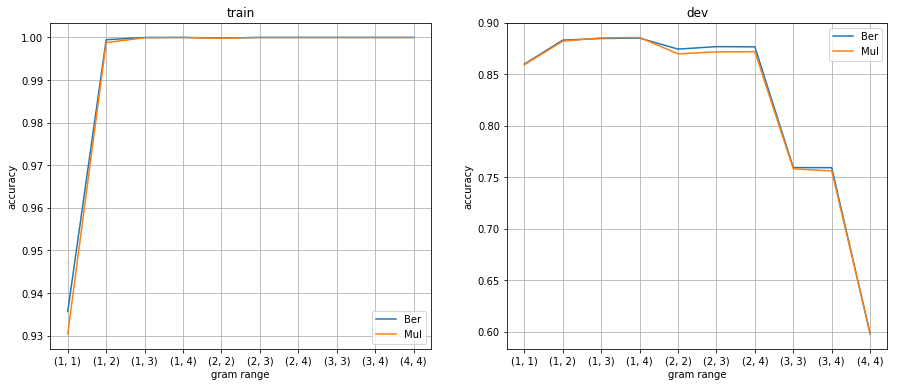

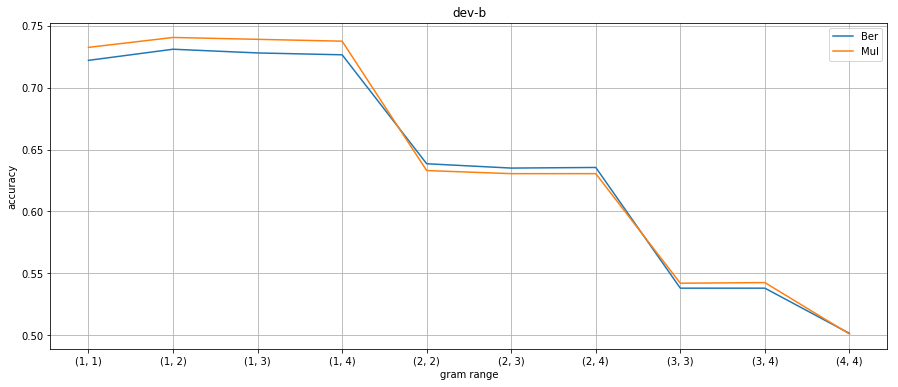

In [234]:

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot([str(gram) for gram in grams_range],[res[2] for res in result_ber],label='Ber')
plt.plot([str(gram) for gram in grams_range],[res[2] for res in result_mul],label='Mul')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('train')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot([str(gram) for gram in grams_range],[res[0] for res in result_ber],label='Ber')
plt.plot([str(gram) for gram in grams_range],[res[0] for res in result_mul],label='Mul')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('dev')
plt.legend()
plt.grid()

plt.figure(figsize=(15,6))
plt.plot([str(gram) for gram in grams_range],[res[1] for res in result_ber],label='Ber')
plt.plot([str(gram) for gram in grams_range],[res[1] for res in result_mul],label='Mul')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('dev-b')
plt.legend()
plt.grid()

As we can see the the best accuracy on private and public dev achieved when vocabluary has Unigrams & Bigrams, also adding Trigramms it is better than Unigram. 

When we use only trigramms and more grams, it give us bad result, but using oly bigrams increase the results for public dev dataset. It means that we have overfitting when we use only trigrams and more.



In [131]:
def save_submission(train,dev,test,dev_b,test_b,gram_range=(1,1),name='preds_res',inplace=False):
    ind_train = [ 'train/'+str(i) for i in range(0,len(train[gram_range]))]
    ind_dev = [ 'dev/'+str(i) for i in range(0,len(dev[gram_range]))]
    ind_test = [ 'test/'+str(i) for i in range(0,len(test[gram_range]))]
    ind_devb = [ 'dev-b/'+str(i) for i in range(0,len(dev_b[gram_range]))]
    ind_testb = [ 'test-b/'+str(i) for i in range(0,len(test_b[gram_range]))]
    inds = ind_train+ind_dev +ind_test +ind_devb +ind_testb
    
    sub = pd.Series(train[gram_range]+dev[gram_range]+test[gram_range]+dev_b[gram_range]+test_b[gram_range])
    sub.index = inds
    
    
    if inplace:
        name = name+'_'+str(gram_range[0])+'_'+str(gram_range[1])+'.tsv'
        sub.to_csv(name,sep='\t',header=False)
    else:
        return sub
    

In [277]:
save_submission(train_probs_ngram_mul,dev_probs_ngram_mul,test_probs_ngram_mul,dev_b_probs_ngram_mul,test_b_probs_ngram_mul,gram_range=(1,4),name='preds_mul', inplace=True)

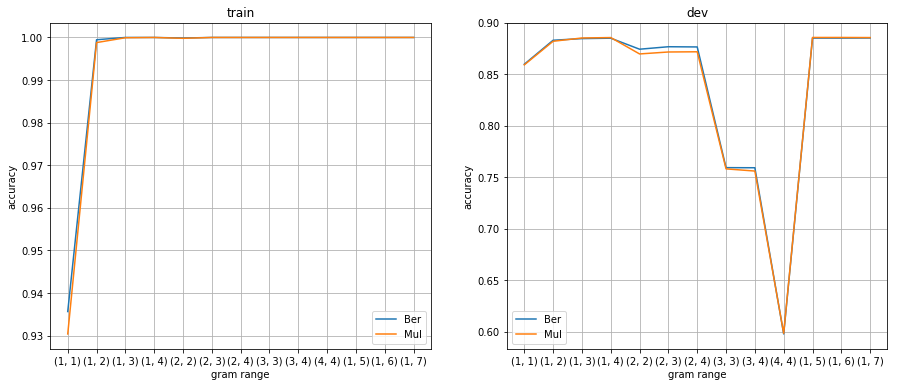

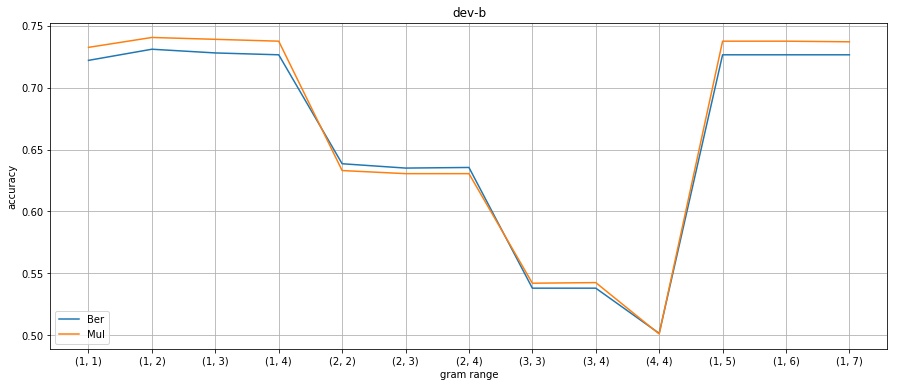

In [295]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot([str(gram) for gram in grams_range],[res[2] for res in result_ber],label='Ber')
plt.plot([str(gram) for gram in grams_range],[res[2] for res in result_mul],label='Mul')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('train')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot([str(gram) for gram in grams_range],[res[0] for res in result_ber],label='Ber')
plt.plot([str(gram) for gram in grams_range],[res[0] for res in result_mul],label='Mul')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('dev')
plt.legend()
plt.grid()

plt.figure(figsize=(15,6))
plt.plot([str(gram) for gram in grams_range],[res[1] for res in result_ber],label='Ber')
plt.plot([str(gram) for gram in grams_range],[res[1] for res in result_mul],label='Mul')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('dev-b')
plt.legend()
plt.grid()

## Let's fit on train and dev

In [123]:
dev_pos = pos_neg_reviews('pos',dev_texts, dev_labels)
dev_neg = pos_neg_reviews('neg',dev_texts,dev_labels)

In [124]:
dev_pos = preprocess(dev_pos,stop_words=True,punctuation=True)
dev_neg = preprocess(dev_neg,stop_words=True,punctuation=True)

In [125]:
dev_pos_tok = tokenization(dev_pos)
dev_neg_tok = tokenization(dev_neg)

In [126]:
all_ = train_texts_stop_punc_tok +dev_texts_tok
all_pos = train_texts_stop_punc_pos_tok+dev_pos_tok
all_neg = train_texts_stop_punc_neg_tok+dev_neg_tok

In [127]:
print(len(train_texts_stop_punc_pos_tok),len(dev_pos_tok),len(all_pos))
len(train_texts_stop_punc_neg_tok),len(dev_neg_tok),len(all_neg)

7520 4980 12500


(7480, 5020, 12500)

In [86]:
grams_range = [(1,2),(1,3),(1,4),(1,5),(2,2),(2,4)]

In [87]:
dev_probs_ngram_ber_all = dict()
train_probs_ngram_ber_all = dict()
dev_b_probs_ngram_ber_all = dict()
test_probs_ngram_ber_all = dict()
test_b_probs_ngram_ber_all = dict()

result_ber_all = []
for grm_rng in grams_range:
    print(grm_rng)
    df_bigr_ber_all, vocab_bigr_ber_all, vocab_bigr_ber_all_pos, vocab_bigr_ber_all_neg = fit_ngram(all_, all_pos, all_neg, mode='ber',gram_range=grm_rng)
    vocab_bigr_ber_all = set(df_bigr_ber_all.index)
    train_probs_ngram_ber_all[grm_rng] = predict_ber(train_texts_stop_punc, vocab=vocab_bigr_ber_all,  vocab_pos=vocab_bigr_ber_all_pos,vocab_neg=vocab_bigr_ber_all_neg, df=df_bigr_ber_all,gram_range=grm_rng)    
    dev_probs_ngram_ber_all[grm_rng] = predict_ber(dev_texts, vocab=vocab_bigr_ber_all,  vocab_pos=vocab_bigr_ber_all_pos,vocab_neg=vocab_bigr_ber_all_neg, df=df_bigr_ber_all,gram_range=grm_rng)
    dev_b_probs_ngram_ber_all[grm_rng] = predict_ber(dev_b_texts, vocab=vocab_bigr_ber_all,  vocab_pos=vocab_bigr_ber_all_pos,vocab_neg=vocab_bigr_ber_all_neg, df=df_bigr_ber_all,gram_range=grm_rng)
    test_probs_ngram_ber_all[grm_rng] = predict_ber(test_texts, vocab=vocab_bigr_ber_all,   vocab_pos=vocab_bigr_ber_all_pos,vocab_neg=vocab_bigr_ber_all_neg, df=df_bigr_ber_all,gram_range=grm_rng)
    test_b_probs_ngram_ber_all[grm_rng] = predict_ber(test_b_texts, vocab=vocab_bigr_ber_all, vocab_pos=vocab_bigr_ber_all_pos,vocab_neg=vocab_bigr_ber_all_neg, df=df_bigr_ber_all,gram_range=grm_rng)
    res = [evaluate(dev_probs_ngram_ber_all[grm_rng],dev_labels),evaluate(dev_b_probs_ngram_ber_all[grm_rng],dev_b_labels),evaluate(train_probs_ngram_ber_all[grm_rng],train_labels)]
    print(grm_rng)
    print('dev =',res[0],'dev_b =',res[1],'train =',res[2])
    result_ber_all.append(res)
    

(1, 2)



(1, 2)
dev = 0.999 dev_b = 0.7415 train = 0.999
(1, 3)



(1, 3)
dev = 0.9999 dev_b = 0.741 train = 0.9999333333333333
(1, 4)



(1, 4)
dev = 1.0 dev_b = 0.741 train = 1.0
(1, 5)



(1, 5)
dev = 1.0 dev_b = 0.741 train = 1.0
(2, 2)



(2, 2)
dev = 0.9997 dev_b = 0.659 train = 0.9996666666666667
(2, 4)



(2, 4)
dev = 1.0 dev_b = 0.6565 train = 1.0


In [93]:
df_bigr_mul_all, vocab_bigr_mul_all, vocab_bigr_mul_all_pos, vocab_bigr_mul_all_neg = fit_ngram(train_texts_stop_punc_tok, train_texts_stop_punc_pos_tok, train_texts_stop_punc_neg_tok, mode='ber',gram_range=(1,3))
vocab_bigr_mul_all = set(df_bigr_mul_all.index)
dev_probs_mul_all = predict_mul(dev_texts, vocab=vocab_bigr_mul_all,  df=df_bigr_mul_all,gram_range=(1,3))
train_probs_mul_all = predict_mul(train_texts_stop_punc, vocab=vocab_bigr_mul_all, df=df_bigr_mul_all,gram_range=(1,3))

dev_b_probs_mul_all = predict_mul(dev_b_texts, vocab=vocab_bigr_mul_all, df=df_bigr_mul_all,gram_range=(1,3))

test_probs_mul_all = predict_mul(test_texts, vocab=vocab_bigr_mul_all, df=df_bigr_mul_all,gram_range=(1,3))
test_b_probs_mul_all = predict_mul(test_b_texts, vocab=vocab_bigr_mul_all, df=df_bigr_mul_all,gram_range=(1,3))
print('dev =',evaluate(dev_probs_mul_all,dev_labels),'dev_b =',evaluate(dev_b_probs_mul_all,dev_b_labels),'train =',evaluate(train_probs_mul_all,train_labels))


dev = 0.8846 dev_b = 0.728 train = 1.0


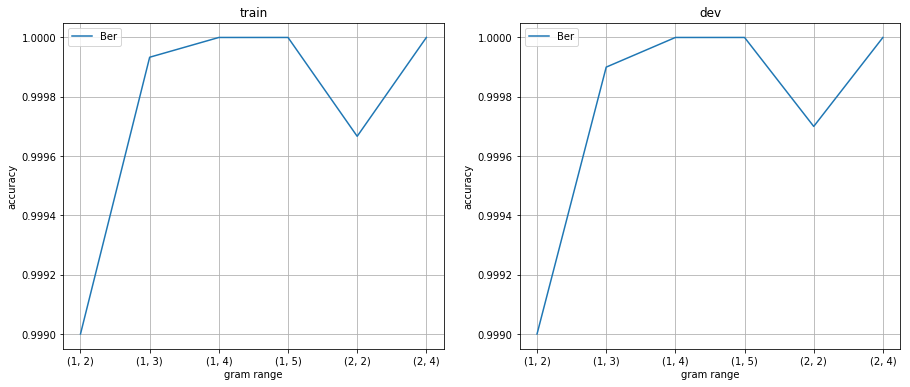

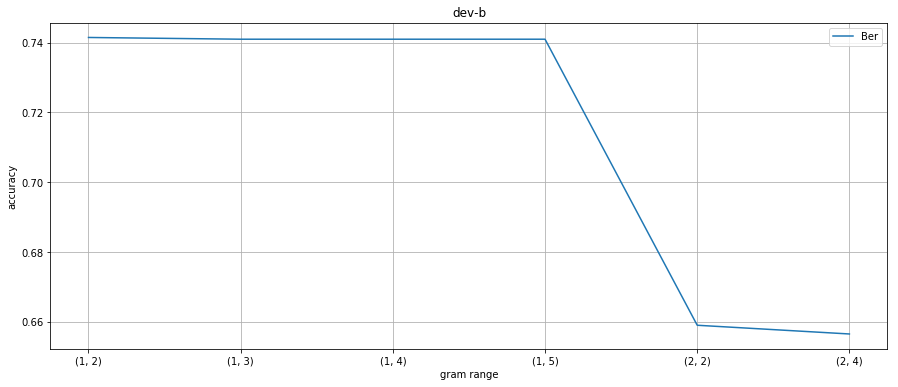

In [91]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot([str(gram) for gram in grams_range],[res[2] for res in result_ber_all],label='Ber')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('train')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot([str(gram) for gram in grams_range],[res[0] for res in result_ber_all],label='Ber')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('dev')
plt.legend()
plt.grid()

plt.figure(figsize=(15,6))
plt.plot([str(gram) for gram in grams_range],[res[1] for res in result_ber_all],label='Ber')
plt.xlabel('gram range')
plt.ylabel('accuracy')
plt.title('dev-b')
plt.legend()
plt.grid()

In [96]:
save_submission(train_probs_ngram_ber_all,dev_probs_ngram_ber_all,test_probs_ngram_ber_all,dev_b_probs_ngram_ber_all,test_b_probs_ngram_ber_all,gram_range=(1,4),name='preds_ber_all', inplace=True)

### as we can see it is really improve the results but it is not like a silver bullet

## 3. Research part

1. $P(w|c_j )$ estimations are unreliable for words with low frequencies. For example, it may be just a coincidence that a word occurred only 2 times and in positive texts only. On the contrary, if it occurs 1000 times and in positive texts only: this is highly likely to be a regularity, a consistent pattern. 

Try to delete words from the dictionaries that occur at least several times (set some $min\_cnt$ value). Does it help to improve the results for the unigram model? Bigram model? Which $min\_cnt$ value is more suitable for each model?


Compare the thresholds for document frequency and term frequency: draw dependence plots on accuraсy versus vocabulary size. Find the threshold to get equal vocabulary sizes for each option.

In [110]:
def make_vocab_ngram(text, mode='ber',gram_range=(1,1), min_cnt=0):
    vocab = dict()
    
    if mode == 'ber':    
        for line in text:
            for word in set(ngrams(line,gram_range)):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
    else:
        for line in text:
            for word in ngrams(line,gram_range):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
                    
    if min_cnt:
        new_dict = dict()
        for key,val in vocab.items():
            if val > min_cnt:
                new_dict[key] = val
        vocab = new_dict
    return vocab

In [120]:
dev_probs_cnt = dict()
train_probs_cnt = dict()
dev_b_probs_cnt = dict()
test_probs_cnt = dict()
test_b_probs_cnt = dict()

grams_range = [(1,3),(1,4)]
min_cnts = [1,2,3,5]
result_cnt = []
for grm_rng in grams_range:
    for min_cnt in min_cnts:
        df_bigrcnt, vocab_bigrcnt, vocab_bigrcnt_pos, vocab_bigrcnt_neg = fit_ngram(train_texts_stop_punc_tok, train_texts_stop_punc_pos_tok, train_texts_stop_punc_neg_tok, mode='ber',gram_range=grm_rng,min_cnt=min_cnt)
        vocab_bigrcnt = set(df_bigrcnt.index)
        train_probs_cnt[(grm_rng,min_cnt)] = predict_ber(train_texts_stop_punc, vocab=vocab_bigrcnt, df=df_bigrcnt,gram_range=grm_rng)    
        dev_probs_cnt[(grm_rng,min_cnt)] = predict_ber(dev_texts, vocab=vocab_bigrcnt, df=df_bigrcnt,gram_range=grm_rng)
        dev_b_probs_cnt[(grm_rng,min_cnt)] = predict_ber(dev_b_texts, vocab=vocab_bigrcnt, df=df_bigrcnt,gram_range=grm_rng)
        test_probs_cnt[(grm_rng,min_cnt)] = predict_ber(test_texts, vocab=vocab_bigrcnt, df=df_bigrcnt,gram_range=grm_rng)
        test_b_probs_cnt[(grm_rng,min_cnt)] = predict_ber(test_b_texts, vocab=vocab_bigrcnt, df=df_bigrcnt,gram_range=grm_rng)
        res = [evaluate(dev_probs_cnt[(grm_rng,min_cnt)],dev_labels),evaluate(dev_b_probs_cnt[(grm_rng,min_cnt)],dev_b_labels),evaluate(train_probs_cnt[(grm_rng,min_cnt)],train_labels)]
    
        print(grm_rng,min_cnt)
        print('dev =',res[0],'dev_b =',res[1],'train =',res[2])
        result_cnt.append(res)

(1, 3) 1
dev = 0.88 dev_b = 0.718 train = 0.9869333333333333


(1, 3) 2
dev = 0.8751 dev_b = 0.722 train = 0.9677333333333333


(1, 3) 3
dev = 0.8756 dev_b = 0.7205 train = 0.9534666666666667


(1, 3) 5
dev = 0.8693 dev_b = 0.7225 train = 0.9326666666666666


(1, 4) 1
dev = 0.8803 dev_b = 0.718 train = 0.987


(1, 4) 2
dev = 0.8748 dev_b = 0.722 train = 0.9678


(1, 4) 3
dev = 0.8753 dev_b = 0.7205 train = 0.9533333333333334


(1, 4) 5
dev = 0.8693 dev_b = 0.7225 train = 0.9327333333333333


In [129]:
dev_probs_cnt_all = dict()
train_probs_cnt_all = dict()
dev_b_probs_cnt_all = dict()
test_probs_cnt_all = dict()
test_b_probs_cnt_all = dict()

grams_range = [(1,3),(1,4)]
min_cnt_alls = [1,2,3,5]
result_cnt_all = []
for grm_rng in grams_range:
    for min_cnt_all in min_cnt_alls:
        df_bigrcnt_all, vocab_bigrcnt_all, vocab_bigrcnt_all_pos, vocab_bigrcnt_all_neg = fit_ngram(all_, all_pos, all_neg, mode='ber',gram_range=grm_rng,min_cnt=min_cnt_all)
        vocab_bigrcnt_all = set(df_bigrcnt_all.index)
        train_probs_cnt_all[(grm_rng,min_cnt_all)] = predict_ber(train_texts_stop_punc, vocab=vocab_bigrcnt_all, df=df_bigrcnt_all,gram_range=grm_rng)    
        dev_probs_cnt_all[(grm_rng,min_cnt_all)] = predict_ber(dev_texts, vocab=vocab_bigrcnt_all, df=df_bigrcnt_all,gram_range=grm_rng)
        dev_b_probs_cnt_all[(grm_rng,min_cnt_all)] = predict_ber(dev_b_texts, vocab=vocab_bigrcnt_all, df=df_bigrcnt_all,gram_range=grm_rng)
        test_probs_cnt_all[(grm_rng,min_cnt_all)] = predict_ber(test_texts, vocab=vocab_bigrcnt_all, df=df_bigrcnt_all,gram_range=grm_rng)
        test_b_probs_cnt_all[(grm_rng,min_cnt_all)] = predict_ber(test_b_texts, vocab=vocab_bigrcnt_all, df=df_bigrcnt_all,gram_range=grm_rng)
        res = [evaluate(dev_probs_cnt_all[(grm_rng,min_cnt_all)],dev_labels),evaluate(dev_b_probs_cnt_all[(grm_rng,min_cnt_all)],dev_b_labels),evaluate(train_probs_cnt_all[(grm_rng,min_cnt_all)],train_labels)]
    
        print(grm_rng,min_cnt_all)
        print('dev =',res[0],'dev_b =',res[1],'train =',res[2])
        result_cnt_all.append(res)

(1, 3) 1
dev = 0.9822 dev_b = 0.73 train = 0.9837333333333333


(1, 3) 2
dev = 0.9651 dev_b = 0.7305 train = 0.9638


(1, 3) 3
dev = 0.9516 dev_b = 0.7225 train = 0.9496666666666667


(1, 3) 5
dev = 0.9332 dev_b = 0.7335 train = 0.9321333333333334


(1, 4) 1
dev = 0.9824 dev_b = 0.73 train = 0.9838


(1, 4) 2
dev = 0.9653 dev_b = 0.7305 train = 0.9637333333333333


(1, 4) 3
dev = 0.9517 dev_b = 0.7225 train = 0.9498666666666666


(1, 4) 5
dev = 0.9331 dev_b = 0.7335 train = 0.932


In [134]:
save_submission(train_probs_cnt,dev_probs_cnt,test_probs_cnt,dev_b_probs_cnt,test_b_probs_cnt,gram_range=((1,3),1),name='preds_ber_all_cnt', inplace=True)

In [138]:
save_submission(train_probs_cnt_all,dev_probs_cnt_all,test_probs_cnt_all,dev_b_probs_cnt_all,test_b_probs_cnt_all,gram_range=((1,4),2),name='preds_ber_all_cnt_all', inplace=True)

### All these schemes don't improve result in compare with fit on train and dev

2. Multinomial Naive Bayes classifier may take (or not) into account word frequencies (by keeping or deleting words that occur more than once). How does it affect the results?

Of course it will be work worse because we don't take into account valuable feature.

3. Preprocessing is crucial for the model performance. Try different methods: lowercase, punctuation deletion, replacing numbers with the **NUMBER** token. How do those methods affect the results?

I did it before ngram part and  **lowercase, punctuation deletion** increase the result except **replacing numbers** which decrease the result (we have valuable numbers like 8-9/10 etc) 

4. Some words in the test set do not appear in the dictionaries. However, they may also be a good indicator (for instance, a lot of unknown words in a email is a good feature for spam detection). Try to replace unknown words with **UNK** token. How do we estimate $P( UNK |c_j )$ then? 

_Hint: we get this by replacing words that occur only once in the training set with this token._

In [161]:
def predict_ber_unk(texts,vocab=vocab,vocab_pos=vocab_pos,vocab_neg=vocab_neg,df=df,gram_range=(1,1)):
    
    def unique_list(list1): 
        unique_list = [] 

        for x in list1: 
            if x not in unique_list: 
                unique_list.append(x) 
        return unique_list

    tokens = tokenization_gram(texts,gram_range=gram_range)
    probs = []
    p_c_pos = np.log(train_pos_all/(train_pos_all+train_neg_all))
    p_c_neg = np.log(train_neg_all/(train_pos_all+train_neg_all))
    pos_probs = df['pos_probs']
    neg_probs = df['neg_probs']
    for line in tqdm_notebook(tokens):
        pos_prob = p_c_pos
        neg_prob = p_c_neg
        line = unique_list(line)
        for i,word in enumerate(line): # for accelerating I change loop words in vocab -> loop  words in tokens w
            flag_pos = 0
            flag_neg = 0
            if word in vocab:
                if word in vocab_pos:
                    flag_pos = 1
                if word in vocab_neg:
                    flag_neg = 1
                    
                p_prob,n_prob = pos_probs[word],neg_probs[word]
                pos_prob += np.log(flag_pos*p_prob+(1-flag_pos)*(p_prob))
                neg_prob += np.log(flag_neg*n_prob+(1-flag_neg)*(n_prob))
            else:
                if (i>0) and (line[i-1] in vocab):
                    word = line[i-1]
                    if word in vocab_pos:
                        flag_pos = 1
                    if word in vocab_neg:
                        flag_neg = 1

                    p_prob,n_prob = pos_probs[word],neg_probs[word]
                    pos_prob += np.log(flag_pos*p_prob+(1-flag_pos)*(p_prob))
                    neg_prob += np.log(flag_neg*n_prob+(1-flag_neg)*(n_prob))
                    
            
        if pos_prob > neg_prob:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [162]:
df_unk_ber, vocab_unk_ber, vocab_unk_ber_pos, vocab_unk_ber_neg = fit_ngram(train_texts_stop_punc_tok, train_texts_stop_punc_pos_tok, train_texts_stop_punc_neg_tok, mode='ber',gram_range=(1,4))
dev_probs_unk = predict_ber_unk(dev_texts, vocab=vocab_unk_ber,vocab_pos=vocab_unk_ber_pos, vocab_neg=vocab_unk_ber_neg ,df=df_unk_ber,gram_range=(1,4))
train_probs_unk = predict_ber_unk(train_texts_stop_punc, vocab=vocab_unk_ber, df=df_unk_ber,gram_range=(1,4))

dev_b_probs_unk = predict_ber_unk(dev_b_texts, vocab=vocab_unk_ber, df=df_unk_ber,gram_range=(1,4))

In [165]:
test_probs_unk = predict_ber_unk(test_texts, vocab=vocab_unk_ber,vocab_pos=vocab_unk_ber_pos, vocab_neg=vocab_unk_ber_neg , df=df_unk_ber,gram_range=(1,4))
test_b_probs_unk = predict_ber_unk(test_b_texts, vocab=vocab_unk_ber,vocab_pos=vocab_unk_ber_pos, vocab_neg=vocab_unk_ber_neg, df=df_unk_ber,gram_range=(1,4))

In [163]:
print('dev =',evaluate(dev_probs_unk,dev_labels),'dev_b =',evaluate(dev_b_probs_unk,dev_b_labels),'train =',evaluate(train_probs_unk,train_labels))

dev = 0.8877 dev_b = 0.728 train = 1.0


In [166]:
final_n_b_unk = pd.Series(train_probs_unk+dev_probs_unk+test_probs_unk+dev_b_probs_unk+test_b_probs_unk)
final_n_b_unk.index = inds
final_n_b_unk.to_csv('preds_ber_unk_1_4.tsv',sep='\t',header=False)

In [173]:
df_unk_f_ber, vocab_unk_f_ber, vocab_unk_f_ber_pos, vocab_unk_f_ber_neg = fit_ngram(all_, all_pos, all_neg, mode='ber',gram_range=(1,4))
vocab_unk_f_ber = set(df_unk_f_ber.index)
dev_probs_unk_f = predict_ber_unk(dev_texts, vocab=vocab_unk_f_ber,vocab_pos=vocab_unk_f_ber_pos, vocab_neg=vocab_unk_f_ber_neg ,df=df_unk_f_ber,gram_range=(1,4))
train_probs_unk_f = predict_ber_unk(train_texts_stop_punc, vocab=vocab_unk_f_ber, df=df_unk_f_ber,gram_range=(1,4))

dev_b_probs_unk_f = predict_ber_unk(dev_b_texts, vocab=vocab_unk_f_ber, df=df_unk_f_ber,gram_range=(1,4))

print('dev =',evaluate(dev_probs_unk_f,dev_labels),'dev_b =',evaluate(dev_b_probs_unk_f,dev_b_labels),'train =',evaluate(train_probs_unk_f,train_labels))

test_probs_unk_f = predict_ber_unk(test_texts, vocab=vocab_unk_f_ber,vocab_pos=vocab_unk_f_ber_pos, vocab_neg=vocab_unk_f_ber_neg , df=df_unk_f_ber,gram_range=(1,4))
test_b_probs_unk_f = predict_ber_unk(test_b_texts, vocab=vocab_unk_f_ber,vocab_pos=vocab_unk_f_ber_pos, vocab_neg=vocab_unk_f_ber_neg, df=df_unk_f_ber,gram_range=(1,4))

dev = 1.0 dev_b = 0.7355 train = 1.0


In [174]:
final_b_unk = pd.Series(train_probs_unk_f+dev_probs_unk_f+test_probs_unk_f+dev_b_probs_unk_f+test_b_probs_unk_f)
final_b_unk.index = inds
final_b_unk.to_csv('preds_ber_unk_all_1_4.tsv',sep='\t',header=False)

### I want to try hypothesis about to use previous word if we don't know current. It increases the results for default train dataset but not for all train(train+dev)

5. Check the relation between the document length and the class label. Draw the distribution of document lengths for each class. Is it useful to take the length into account? 

In [161]:
train_texts_neg_len = [len(line) for line in train_texts_neg]
train_texts_pos_len = [len(line) for line in train_texts_pos]

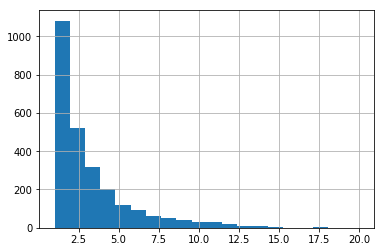

In [173]:
pd.Series(train_texts_neg_len).value_counts().hist(bins=20)

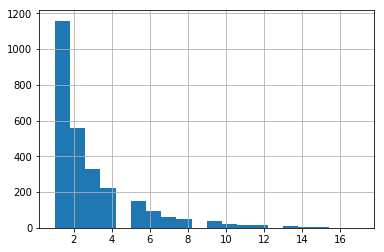

In [191]:
pd.Series(train_texts_pos_len).value_counts().hist(bins=20)

In [162]:
print('length of negative reviews\n','min =',np.min(train_texts_neg_len),'max =',np.max(train_texts_neg_len),)
print('avg =',np.mean(train_texts_neg_len),'median =',np.median(train_texts_neg_len))

length of negative reviews
 min = 52 max = 8969
avg = 1316.356550802139 median = 981.0


In [163]:
print('length of positive reviews\n','min =',np.min(train_texts_pos_len),'max =',np.max(train_texts_pos_len),)
print('avg =',np.mean(train_texts_pos_len),'median =',np.median(train_texts_pos_len))

length of positive reviews
 min = 70 max = 10363
avg = 1360.801329787234 median = 996.5


In [164]:
dev_text_pos = pos_neg_reviews('pos',dev_texts, dev_labels)
dev_text_neg = pos_neg_reviews('neg',dev_texts,dev_labels)
dev_neg_len = [len(line) for line in dev_text_neg]
dev_pos_len = [len(line) for line in dev_text_pos]


In [165]:
print('length of negative reviews\n','min =',np.min(dev_neg_len),'max =',np.max(dev_neg_len),)
print('avg =',np.mean(dev_neg_len),'median =',np.median(dev_neg_len))

length of negative reviews
 min = 55 max = 4903
avg = 792.2555776892431 median = 593.0


In [166]:
print('length of negative reviews\n','min =',np.min(dev_pos_len),'max =',np.max(dev_pos_len),)
print('avg =',np.mean(dev_pos_len),'median =',np.median(dev_pos_len))

length of negative reviews
 min = 66 max = 9190
avg = 838.9100401606426 median = 600.0


### as we can see it is not useful to take the length into account